In [11]:
import pandas as pd

In [12]:
weather_aa_df = pd.read_csv('data/weather/ann-arbor-weather.csv')
weather_aa_df.date = weather_aa_df.date.astype('datetime64[ns]')

weather_msk_df = pd.read_csv('data/weather/minsk-weather.csv')
weather_msk_df.date = weather_aa_df.date.astype('datetime64[ns]')

In [13]:
column_names = ["No",
"genetic_Acc_No",
"num",
"Cultivar",
"Serial_No",
"ID",
"Regidity",
"Thickness",
"Bush",
"Early_Bot",
"Bot",
"Mildew",
"date",
"City"]

# reading plant data for AA
aa_2015 = pd.read_excel('data/plants/msk_aa_15-18.xlsx', sheet_name=4, na_values=['NA','Na'], names=column_names)
aa_2016 = pd.read_excel('data/plants/msk_aa_15-18.xlsx', sheet_name=5, na_values=['NA','Na'], names=column_names)
aa_2017 = pd.read_excel('data/plants/msk_aa_15-18.xlsx', sheet_name=6, na_values=['NA','Na'], names=column_names)
aa_2018 = pd.read_excel('data/plants/msk_aa_15-18.xlsx', sheet_name=7, na_values=['NA','Na'], names=column_names)

In [14]:
aa_2015.head()

,No,genetic_Acc_No,num,Cultivar,Serial_No,ID,Regidity,Thickness,Bush,Early_Bot,Bot,Mildew,date,City
0,25.0,25.1,25.2,Albert Crousse,391.0,161CD,3.125,7.285,3.00,NaN,0.7,0.0,2015-07-11,Ann Arbor
1,26.0,26.1,26.2,Arcturus,115.0,45AB,2.750,6.100,3.00,NaN,2.0,0.1,2015-07-11,Ann Arbor
2,27.0,27.1,27.2,Arlequin,73.0,33AB,3.000,7.250,4.00,NaN,2.0,0.0,2015-07-11,Ann Arbor
3,28.0,28.1,28.2,Augustin D'Hour = General MacMahon,383.0,155AB,3.500,8.450,4.25,NaN,0.9,0.0,2015-07-11,Ann Arbor
4,29.0,29.1,29.2,Boule de Neige,211.0,84CD,4.000,8.935,4.00,NaN,2.0,0.0,2015-07-11,Ann Arbor


In [15]:
aa_2015_bot = aa_2015.loc[:, ['Cultivar','ID','Bot','date']]
aa_2016_bot = aa_2016.loc[:, ['Cultivar','ID','Bot','date']]
aa_2017_bot = aa_2017.loc[:, ['Cultivar','ID','Bot','date']]
aa_2018_bot = aa_2018.loc[:, ['Cultivar','ID','Bot','date']]

In [16]:
aa_2016_bot.head()

,Cultivar,ID,Bot,date
0,Albert Crousse,161CD,0.75,2016-08-01
1,Arcturus,45AB,0.35,2016-07-28
2,Arlequin,33AB,0.10,2016-07-28
3,Augustin D'Hour = General MacMahon,155AB,0.75,2016-08-01
4,Boule de Neige,84CD,0.85,2016-07-29


In [17]:
plant_aa_df = pd.concat([aa_2015_bot,aa_2016_bot,aa_2017_bot,aa_2018_bot])

In [18]:
plant_aa_df.head()

,Cultivar,ID,Bot,date
0,Albert Crousse,161CD,0.7,2015-07-11
1,Arcturus,45AB,2.0,2015-07-11
2,Arlequin,33AB,2.0,2015-07-11
3,Augustin D'Hour = General MacMahon,155AB,0.9,2015-07-11
4,Boule de Neige,84CD,2.0,2015-07-11


In [19]:
plant_aa_df.date = plant_aa_df.date.apply(lambda x: str(x)[0:4])

In [20]:
plant_aa_df.head()

,Cultivar,ID,Bot,date
0,Albert Crousse,161CD,0.7,2015
1,Arcturus,45AB,2.0,2015
2,Arlequin,33AB,2.0,2015
3,Augustin D'Hour = General MacMahon,155AB,0.9,2015
4,Boule de Neige,84CD,2.0,2015


In [23]:
weather_aa_df.head()

,date,maxtempC,mintempC,avgtempC,precipMM,humidity,cloudcover
0,2015-04-15,16,6,11.0,0.0,54,7
1,2015-04-16,17,7,12.0,3.9,85,88
2,2015-04-17,23,9,16.0,0.0,73,27
3,2015-04-18,20,14,17.0,0.0,61,9
4,2015-04-19,14,7,10.5,8.2,72,74


In [22]:
# need to calculate for each year the averages
aa_w_by_year_df = weather_aa_df.groupby(weather_aa_df.date.dt.year).mean()

# the same for minsk
msk_w_by_year_df = weather_msk_df.groupby(weather_msk_df.date.dt.year).mean()

In [196]:
aa_w_by_year

,maxtempC,mintempC,avgtempC,precipMM,humidity,cloudcover
date,,,,,,
2015,25.053254,16.053254,20.553254,3.163314,75.467456,42.769231
2016,25.278107,16.331361,20.804734,3.165089,71.514793,44.905325
2017,23.520710,14.869822,19.195266,3.142604,72.798817,37.538462
2018,23.455621,14.923077,19.189349,4.266864,71.982249,43.857988


In [180]:
msk_w_by_year

,maxtempC,mintempC,avgtempC,precipMM,humidity,cloudcover
date,,,,,,
2015,21.319527,10.289941,15.804734,1.656213,72.331361,38.704142
2016,20.431953,10.923077,15.677515,1.920118,76.449704,41.585799
2017,18.786982,12.988166,15.887574,3.203550,73.177515,42.159763
2018,20.911243,15.514793,18.213018,3.263905,74.970414,44.479290


In [198]:
# converting both data columns to string datatype
plant_aa_df.date = plant_aa_df.date.astype('str')
aa_w_by_year_df.index = aa_w_by_year_df.index.astype('str')

# merging the two dataframes (NOTE: perhaps it would have been better to keep them separate to avoid redunduncy?)
plant_weather_aa_df = plant_aa_df.join(aa_w_by_year_df, on = 'date')


In [233]:
plant_weather_aa_df.sample(4)

,Cultivar,ID,Bot,date,maxtempC,mintempC,avgtempC,precipMM,humidity,cloudcover
3,Augustin D'Hour = General MacMahon,155AB,0.100,2018,23.455621,14.923077,19.189349,4.266864,71.982249,43.857988
22,Madame de Verneville,71AB,0.875,2017,23.520710,14.869822,19.195266,3.142604,72.798817,37.538462
3,Augustin D'Hour = General MacMahon,155AB,0.750,2016,25.278107,16.331361,20.804734,3.165089,71.514793,44.905325
14,La Rosiere,82AB,2.600,2015,25.053254,16.053254,20.553254,3.163314,75.467456,42.769231


In [250]:
plant_weather_aa_df.Cultivar.value_counts()

Polar Star                            4
Duc de Wellington                     4
Marguerite Gerard                     4
Marie Lemoine                         4
Monsieur Dupont                       4
Albert Crousse                        4
Richardson Perfection                 4
Madame de Verneville                  4
Richard Carvel                        4
Pasteur                               4
Do Tell                               4
La Rosiere                            4
Edulus Superba                        4
La Tulipe                             4
Monsieur Jules Elie                   4
Arcturus                              4
Marie d'Hour                          4
La Perle                              4
Duchesse de Nemours                   4
Couronne d'Or                         4
Boule de Neige                        4
Kelway's Majestic                     4
Gigantea                              4
Augustin D'Hour = General MacMahon    4
Marie Crousse                         4


In [224]:
import altair as alt

Polar_Star = plant_weather_aa_df.loc[plant_weather_aa_df.Cultivar == 'Polar Star']


# .plot(kind='scatter')

In [329]:
Polar_Star_bot = Polar_Star[['Bot','maxtempC']]
Marguerite = plant_weather_aa_df.loc[plant_weather_aa_df.Cultivar == 'Marguerite Gerard']

all_cultivars = alt.Chart(plant_weather_aa_df).mark_point().encode(
    x='Bot',
    y='humidity',
    color='Cultivar'
#     tooltip=['continent','beer_servings']    
).properties(width = 600, height = 600).interactive()



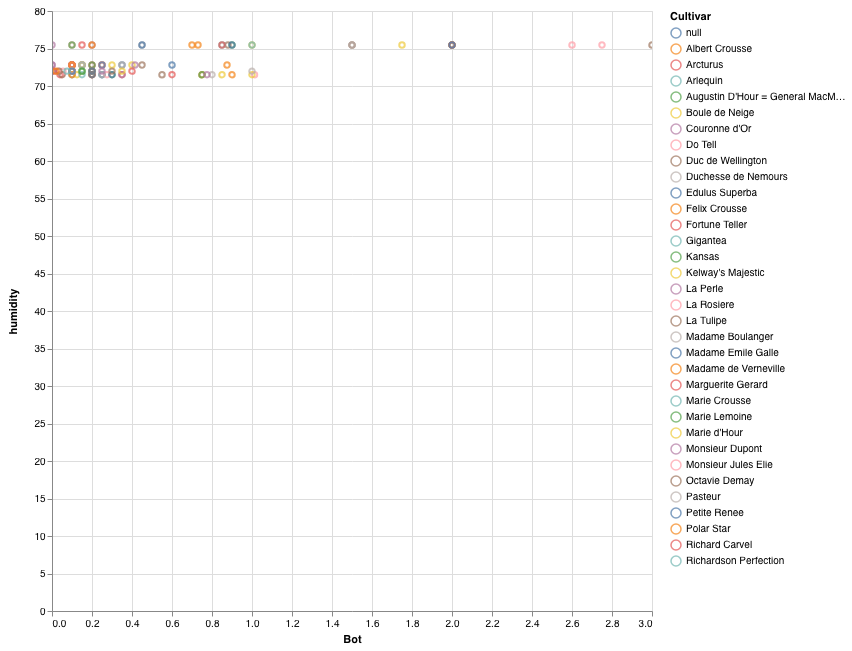

In [330]:
all_cultivars

In [247]:
Polar_Star_bot_plot.encode('humidity', scale=Scale(domain=[70, 80]))

NameError: name 'Scale' is not defined

In [206]:
plant_weather_aa_df.to_csv('plant_weather_aa.csv')

In [283]:
plant_weather_aa_df.groupby('Cultivar').mean().sort_values(by=['Bot'])[['Bot']]

,Bot
Cultivar,
La Perle,0.050000
Do Tell,0.070000
Richardson Perfection,0.075000
Fortune Teller,0.097500
Polar Star,0.130000
Couronne d'Or,0.137500
Kansas,0.150000
Marie Lemoine,0.183333
Madame Emile Galle,0.312500


In [285]:
most_resistant_df = plant_weather_aa_df.groupby('Cultivar').max().sort_values(by=['Bot'])
most_resistant_df[['Bot']]

,Bot
Cultivar,
Richardson Perfection,0.075
Do Tell,0.100
Fortune Teller,0.150
Kansas,0.150
Polar Star,0.200
La Perle,0.200
Marie Lemoine,0.300
Couronne d'Or,0.350
Madame Emile Galle,0.450


In [306]:
plant_names = ['La Perle','Do Tell','Richardson Perfection','Fortune Teller']
plots = []

for p in plant_names:
    df_plant = plant_weather_aa_df.loc[plant_weather_aa_df.Cultivar == p]
    one_plot = alt.Chart(df_plant).mark_point().encode(
        x='Bot',
        y='humidity',
        color='Cultivar'
    #     tooltip=['continent','beer_servings']    
    ).properties(width = 600).interactive()
    plots.append(one_plot)

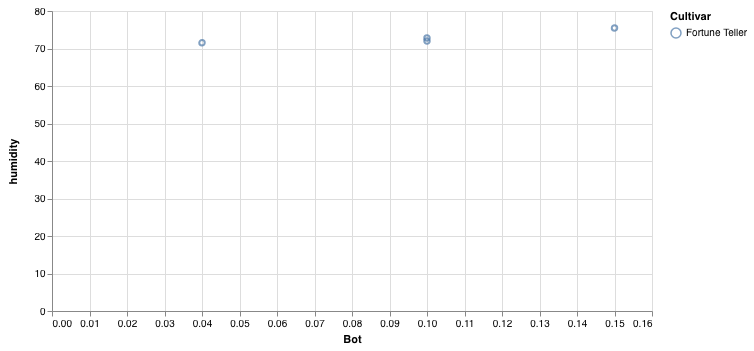

In [307]:
plots[3]

In [25]:
bot_threshold = 0.3
top_most_resistant_df = most_resistant_df[most_resistant_df.Bot < bot_threshold]
top_most_resistant_df.reset_index(level=0, inplace=True)
plant_weather_aa_top_res_df = plant_weather_aa_df.loc[plant_weather_aa_df['Cultivar'].isin(top_most_resistant_df.Cultivar)]


top_most_resistant_plot = alt.Chart(plant_weather_aa_top_res_df).mark_point().encode(
    alt.X('Bot:Q'),
    alt.Y('maxtempC:Q',scale=alt.Scale(domain=(23, 26),clamp=True)),
    color='Cultivar:N',
    shape = 'Cultivar:N'
#     tooltip=['continent','beer_servings']    
).properties(width = 300).interactive()

top_most_resistant_plot

NameError: name 'most_resistant_df' is not defined

In [322]:
top_most_resistant_df.Cultivar

['Richardson Perfection',
 'Do Tell',
 'Fortune Teller',
 'Kansas',
 'Polar Star',
 'La Perle']

,Cultivar,ID,Bot,date,maxtempC,mintempC,avgtempC,precipMM,humidity,cloudcover
6,Do Tell,214CD,0.100,2015,25.053254,16.053254,20.553254,3.163314,75.467456,42.769231
10,Fortune Teller,85ED,0.150,2015,25.053254,16.053254,20.553254,3.163314,75.467456,42.769231
13,La Perle,15CD,0.000,2015,25.053254,16.053254,20.553254,3.163314,75.467456,42.769231
28,Polar Star,154AB,0.200,2015,25.053254,16.053254,20.553254,3.163314,75.467456,42.769231
30,Kansas,24CD,NaN,2015,25.053254,16.053254,20.553254,3.163314,75.467456,42.769231
32,Richardson Perfection,124CD,NaN,2015,25.053254,16.053254,20.553254,3.163314,75.467456,42.769231
6,Do Tell,214CD,0.050,2016,25.278107,16.331361,20.804734,3.165089,71.514793,44.905325
10,Fortune Teller,85ED,0.040,2016,25.278107,16.331361,20.804734,3.165089,71.514793,44.905325
13,La Perle,15CD,0.200,2016,25.278107,16.331361,20.804734,3.165089,71.514793,44.905325
28,Polar Star,154AB,0.200,2016,25.278107,16.331361,20.804734,3.165089,71.514793,44.905325
